# Lecture 7: NumPy

## Introduction

NumPy is a foundational library for scientific computing in Python. It provides the
ability to perform advanced mathematical operations on extensive, multi-dimensional
datasets. It is widely used in fields such as Machine Learning, Image Processing, and
Bioinformatics.

Python, while highly flexible and versatile, is generally much slower than other
programming languages. This is partly due to its flexibility and simplicity (e.g.,
interpreted, no explicit type declarations, accomplish tasks in fewer lines of code).

However, NumPy is written in C (a compiled language known for its speed), which
significantly mitigates these performance drawbacks. When executing a NumPy operation,
you're essentially running compiled C code. This results in operations that are both
faster and more memory-efficient.

While using NumPy, we may have to forgo some of Python's inherent flexibility. However,
as we'll explore, the combination of Python's ease-of-use with the speed of a compiled
language like C offers a compelling mix for data-heavy scientific computing.

## Installation

If you are using Google Colab, NumPy should already be installed by default. You can
check this by trying to import it in the next cell. Check out the previous lecture if
you need a refresh on what importing packages does.

If the following cell causes a `ModuleNotFoundError`, you will have to install NumPy.
With Anaconda, this is made simple through the use of the package managers 'conda' and
'pip'. Just enter either of the following commands into your terminal:
- `conda install numpy`
- `pip install numpy`

Alternatively, you can execute `conda install anaconda` which will install a full suite
of Python scientific programming packages onto your computer, including NumPy.

In [4]:
import numpy as np

A = np.random.normal(0, 1, 36).reshape(6, 6)
U = (A - np.eye(6)) @ np.linalg.inv(A + np.eye(6))

(<matplotlib.image.AxesImage at 0x12fbefaa0>,
 <matplotlib.image.AxesImage at 0x12fc81310>)

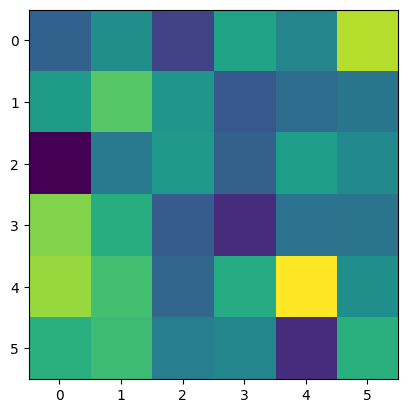

## Array Basics

In Python, lists can dynamically change size and allow elements of different types. In
NumPy, we use ndarrays instead (n-dimensional arrays). These have fixed size at
creation and can only contain elements of the same type. Though this isn't as flexible
as lists, it is necessary for the speed improvements that NumPy provides. To see this
speed-up in action, consider the two following options for performing elementwise
addition on a large list.

In [ ]:
size = 1000000

# First with standard Python lists...
list1 = list(range(size))
list2 = list(range(size))

def add_with_loop(list1, list2):
    result = []
    for i in range(len(list1)):
        result.append(list1[i] + list2[i])
    return result

%timeit add_with_loop(list1, list2)


163 ms ± 44.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Now with NumPy arrays instead...
array1 = np.array(list1)
array2 = np.array(list2)

def add_with_numpy(array1, array2):
    return array1 + array2

%timeit add_with_numpy(array1, array2)

2.1 ms ± 820 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The NumPy implementation provides a significant speed improvement over the standard
Python implementation (nearly 100x). In real-world applications involving large datasets
or images, this difference could translate into hours or days of saved processing time.

In addition to the performance improvements, we see that NumPy provides a more intuitive
and convenient syntax for working with arrays (one line of code vs. four lines of code
above). If you're familiar with MATLAB, NumPy's array syntax will be similar.

In [ ]:
example_list = list(range(5))

print("List:", example_list)
print("List * 3:", example_list * 3)  # Repetition

try:
    print(example_list * example_list)  # Invalid operation
except:
    print("Error: Cannot multiply lists together.")

List: [0, 1, 2, 3, 4]
List * 3: [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
Error: Cannot multiply lists together.


In [ ]:
# We can convert a list to a numpy array using np.array()
arr = np.array(example_list)

print("Array:", arr)
print("Array * 3:", arr * 3)  # Multiplication by scalar
print("Array * Array:", arr * arr)  # Element-wise multiplication

Array: [0 1 2 3 4]
Array * 3: [ 0  3  6  9 12]
Array * Array: [ 0  1  4  9 16]


Numpy also supports multi-dimensional arrays. Let's create a two-dimensional array
(matrix) and perform some operations on it.

In [ ]:
list_2d = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
arr = np.array(list_2d)

print("List:")
print(list_2d)

print("Matrix:")
print(arr)

# Alternatively, iterate through rows.
print("Rows:")
for row in arr:
    print(row)

print("Cols:")
for col in arr.T:
    print(col)

List:
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Rows:
[1 2 3]
[4 5 6]
[7 8 9]
Cols:
[1 4 7]
[2 5 8]
[3 6 9]


Here are some commonly used attributes of NumPy arrays.

In [ ]:
print("type: ", type(arr))
print("dtype: ", arr.dtype)
print("shape: ", arr.shape)
print("ndim: ", arr.ndim)  # number of dimensions
print("size: ", arr.size)  # number of elements

type:  <class 'numpy.ndarray'>
dtype:  int64
shape:  (3, 3)
ndim:  2
size:  9


For the rest of this notebook, we'll stick to 1D and 2D arrays for simplicity, but keep
in mind that NumPy works with arrays of arbitrary dimensionality.

In [ ]:
# 3D array example...
list_3d = [[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [0, 1, 2]]]
arr = np.array(list_3d)

print("array:")
print(arr)
print("type: ", type(arr))
print("dtype: ", arr.dtype)
print("shape: ", arr.shape)
print("ndim: ", arr.ndim)
print("size: ", arr.size)

array:
[[[1 2 3]
  [4 5 6]]

 [[7 8 9]
  [0 1 2]]]
type:  <class 'numpy.ndarray'>
dtype:  int64
shape:  (2, 2, 3)
ndim:  3
size:  12


## Indexing and Slicing

We can index NumPy arrays in a similar manner to NumPy lists. For multi-dimensional
arrays, we can index each dimension separately by placing commas in between the indices.

In [ ]:
print("Matrix:")
arr = np.arange(16).reshape(4, 4)  # Don't worry about this line for now.
print(arr)

print("First row:", arr[0])
print("First column:", arr[:, 0])  # ':' symbol alone selects all elements for axis.
print("First element:", arr[0, 0])

print("First two rows:")
print(arr[0:2])
print("Last two columns:")
print(arr[:, -2:])
print("Middle two rows/columns:")
print(arr[1:3, 1:3])

Matrix:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
First row: [0 1 2 3]
First column: [ 0  4  8 12]
First element: 0
First two rows:
[[0 1 2 3]
 [4 5 6 7]]
Last two columns:
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]
Middle two rows/columns:
[[ 5  6]
 [ 9 10]]


In [ ]:
my_list = ["a", "b", "c", "d", "e"]
my_list[0:3]

['a', 'b', 'c']

In [ ]:
x = np.array([1,2,3,4,5])
x**2

array([ 1,  4,  9, 16, 25])

We can also index NumPy arrays using Booleans instead, which can be a powerful way to
select subsets of your data using conditional expressions. `np.where(condition)` is a
useful function for this purpose, and will return all the indices where a conditional
array evaluates to True.

In [ ]:
arr = np.random.randint(0, 10, 16).reshape(4, 4)

print("Matrix:")
print(arr)
print()

print("Indices (arr < 5):")
print(np.where(arr < 5))
print()

print(np.where(arr < 5, 1, 0))

Matrix:
[[5 0 1 3]
 [8 6 4 8]
 [3 8 6 6]
 [6 3 5 2]]

Indices (arr < 5):
(array([0, 0, 0, 1, 2, 3, 3]), array([1, 2, 3, 2, 0, 1, 3]))

[[0 1 1 1]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 1]]


## Creating Arrays

So far, we've created arrays by wrapping lists with the `np.array()` function, but NumPy
also provides some helper methods for creating common types of arrays.

In [ ]:
size = (5, 5)
print("Zeros:", np.zeros(size))
print("Ones:", np.ones(size))
print("Random (0 to 1):", np.random.rand(*size))  # Uniform distribution on [0, 1)
print("Random Int (0 to 10):", np.random.randint(0, 10, size))  # Uniform on [0, 10)
print("Random Normal:", np.random.normal(0, 1, size))  # Normal dist (mean 0, std 1)

Zeros: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Ones: [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Random (0 to 1): [[0.77678159 0.74192914 0.38632194 0.67789918 0.94849925]
 [0.92395463 0.78066054 0.3004526  0.31130082 0.1900757 ]
 [0.50393857 0.86125823 0.99274112 0.74796918 0.29450618]
 [0.8797208  0.55162414 0.39798946 0.61881265 0.15007749]
 [0.73429983 0.10956805 0.95042655 0.69994096 0.26592877]]
Random Int (0 to 10): [[6 2 0 3 5]
 [2 5 0 8 6]
 [5 2 2 7 3]
 [7 2 7 9 8]
 [2 0 9 0 1]]
Random Normal: [[ 0.23730704 -0.83668234 -0.44696031  1.5381051  -0.8375174 ]
 [ 0.3870212   0.47301943  0.21642249  1.47928248 -1.59416607]
 [-0.88833971  0.15288605  0.47230006 -1.33168954 -2.98649971]
 [-1.18195637  0.97946122 -0.19946071  0.48504628 -0.03577909]
 [-1.03186218 -0.38368613 -1.02337683 -1.06400626 -1.36256987]]


There are also two primary functions to create array sequences.

`np.arange(start, stop, step)` works similarly to the `range()` function we've already
worked with, going from 'start' (inclusive) to 'stop' (exclusive) with an interval of
'step' between each number. Unlike `range()`, however, `arange()` accepts floats as well
as integers.

`np.linspace(start, stop, num)` returns 'num' elements, evenly spaced between 'start'
and 'stop' (both inclusive).

In [ ]:
print("arange()")
print(np.arange(1, 15, 2))  # 1 to 15, step 2
print(np.arange(1, 15))  # 1 to 15, step 1 (default step)
print(np.arange(15))  # 0 to 15, step 1 (default start and step)
print()

print("linspace()")
print(np.linspace(0, 10, 5))  # 5 evenly spaced numbers from 0 to 10
print(np.linspace(0, 10, 11))  # 11 evenly spaced numbers from 0 to 10

arange()
[ 1  3  5  7  9 11 13]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

linspace()
[ 0.   2.5  5.   7.5 10. ]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


We can use `reshape()` to change the shape of our arrays. Note that most NumPy
functions, by default, avoid modifying the original array, so we'll need to assign the
result back to a variable.

In [ ]:
arr = np.arange(9)  # row vector by default

print("Row:")
print(arr.shape)
print(arr)
print()

# Adding an "empty" dimension to the array makes it a column vector.
arr = np.reshape(arr, (arr.size, 1))
print("Column:")
print(arr.shape)
print(arr)
print()

# We can also use 'reshape' as a method.
arr = arr.reshape(3, 3)
print("Matrix:")
print(arr.shape)
print(arr)
print()

# And we can use 'flatten' to convert the matrix back to our original row vector.
arr = arr.flatten()
print("Flattened:")
print(arr.shape)
print(arr)

Row:
(9,)
[0 1 2 3 4 5 6 7 8]

Column:
(9, 1)
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]

Matrix:
(3, 3)
[[0 1 2]
 [3 4 5]
 [6 7 8]]

Flattened:
(9,)
[0 1 2 3 4 5 6 7 8]


In [ ]:
# Some additional common functions for creating matrices...

print("identity:")
print(np.identity(3))
print()

print("eye:")  # similar to identity, but can create non-square matrices.
print(np.eye(3, 5))
print()

print("diag:")
print(np.diag([1, 2, 3]))
print()

print("full:")
print(np.full(shape=(2, 3), fill_value=5))

identity:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

eye:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]

diag:
[[1 0 0]
 [0 2 0]
 [0 0 3]]

full:
[[5 5 5]
 [5 5 5]]


## Common Functions

NumPy provides a wide range of functions for working with arrays. Some common ones are
below, but Google/ChatGPT/StackOverflow are all useful resources for finding the
function you need to solve your problem.

In [ ]:
arr = np.arange(9)

# `type()` only tells us that it is an array, but not what type of array.
print("Type: ", type(arr))

# We can use the `dtype` attribute to find out what type of array it is.
print("Datatype before conversion:", arr.dtype)

# If we want to convert the datatype of this array, we can use the 'astype' function.
# This is often useful when preprocessing data.
arr = arr.astype(float)
print("Datatype after conversion:", arr.dtype)

Type:  <class 'numpy.ndarray'>
Datatype before conversion: int64
Datatype after conversion: float64


In [ ]:
arr = np.array([0.2, 2.42, 3.9, 1.2, -0.156, -4.3, 5.72, 6.0, 0.0, 1.13])

print("array:", arr)
print("round:", np.round(arr))
print("round (1 decimal):", np.round(arr, 1))
print("floor:", np.floor(arr))
print("ceil:", np.ceil(arr))
print("original:", arr)  # Remember, these functions do not modify the original array.

array: [ 0.2    2.42   3.9    1.2   -0.156 -4.3    5.72   6.     0.     1.13 ]
round: [ 0.  2.  4.  1. -0. -4.  6.  6.  0.  1.]
round (1 decimal): [ 0.2  2.4  3.9  1.2 -0.2 -4.3  5.7  6.   0.   1.1]
floor: [ 0.  2.  3.  1. -1. -5.  5.  6.  0.  1.]
ceil: [ 1.  3.  4.  2. -0. -4.  6.  6.  0.  2.]
original: [ 0.2    2.42   3.9    1.2   -0.156 -4.3    5.72   6.     0.     1.13 ]


In [ ]:
# 'min()' and 'max()' functions return the minimum and maximum values in the array.
print("min:", np.min(arr))
print("max:", np.max(arr))
# 'argmin()' and 'argmax()' functions return the index of the min and max values.
print("argmin:", np.argmin(arr))
print("argmax:", np.argmax(arr))

min: 0
max: 8
argmin: 0
argmax: 8


In [ ]:
# The following functions are commonly used to summarize data.
print("size:", np.size(arr))  # number of elements
print("sum:", np.sum(arr))
print("mean:", np.mean(arr))
print("std:", np.std(arr))  # standard deviation
print("var:", np.var(arr))  # variance
print("percentile (25th):", np.percentile(arr, 25))  # 25th percentile
print("median:", np.median(arr))
print("percentile (75th):", np.percentile(arr, 75))  # 75th percentile

size: 9
sum: 36
mean: 4.0
std: 2.581988897471611
var: 6.666666666666667
percentile (25th): 2.0
median: 4.0
percentile (75th): 6.0


In [ ]:
# And some common math functions...
arr = np.array([1, 4, 9, 16, 25])
print("array:", arr)

print("sum:", np.sum(arr))
print("product:", np.prod(arr))
print("diff:", np.diff(arr))  # difference between adjacent elements
print("exp:", np.exp(arr))  # e^x
print("log:", np.log(arr))  # natural log
print("log10:", np.log10(arr))  # log base 10
print("sqrt:", np.sqrt(arr))  # square root

array: [ 1  4  9 16 25]
sum: 55
product: 14400
diff: [3 5 7 9]
exp: [2.71828183e+00 5.45981500e+01 8.10308393e+03 8.88611052e+06
 7.20048993e+10]
log: [0.         1.38629436 2.19722458 2.77258872 3.21887582]
log10: [0.         0.60205999 0.95424251 1.20411998 1.39794001]
sqrt: [1. 2. 3. 4. 5.]


In [ ]:
arr = np.array([3, 3, 5, 1, 2, 1, 1, 4, 4, 2, 3, 5, 5, 1, 2, 4, 4, 3, 2, 1])

print("sort:", np.sort(arr))
print("unique:", np.unique(arr))
print("unique (w/ counts):", np.unique(arr, return_counts=True))

sort: [1 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5]
unique: [1 2 3 4 5]
unique (w/ counts): (array([1, 2, 3, 4, 5]), array([5, 4, 4, 4, 3]))


When working with multi-dimensional arrays, many NumPy functions provide an optional
'axis' argument that allows us to specify which axes we want to group our operations
over (default is to use the entire array).

In [ ]:
arr = np.arange(16).reshape(4, 4)

print("Array:")
print(arr)

print("sum:", np.sum(arr))
print("row sums:", np.sum(arr, axis=1))
print("column sums:", np.sum(arr, axis=0))

print("min: ", np.min(arr))
print("Min (each row): ", np.min(arr, axis=1))
print("Min (each column): ", np.min(arr, axis=0))

Array:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
sum: 120
row sums: [ 6 22 38 54]
column sums: [24 28 32 36]
min:  0
Min (each row):  [ 0  4  8 12]
Min (each column):  [0 1 2 3]


## Linear Algebra

As a matrix library, NumPy provides a wide range of functions from linear algebra as
well that have been optimized for efficiency.

In [ ]:
arr = np.arange(16).reshape(4, 4)
print("Array:")
print(arr)
print()

print("Transpose:")
print(arr.T)
print(np.transpose(arr))
print()

print("Diagonal:")
print(np.diag(arr))
print()

print("Upper Triangular:")
print(np.triu(arr))
print()

print("Lower Triangular:")
print(np.tril(arr))
print()

print("Matrix Multiplication:")
print(np.matmul(arr, arr.T))
print(np.dot(arr, arr.T))
print(arr @ arr.T)

Array:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

Transpose:
[[ 0  4  8 12]
 [ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]]
[[ 0  4  8 12]
 [ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]]

Diagonal:
[ 0  5 10 15]

Upper Triangular:
[[ 0  1  2  3]
 [ 0  5  6  7]
 [ 0  0 10 11]
 [ 0  0  0 15]]

Lower Triangular:
[[ 0  0  0  0]
 [ 4  5  0  0]
 [ 8  9 10  0]
 [12 13 14 15]]

Matrix Multiplication:
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]


In [ ]:
arr = np.random.randint(0, 10, size=(3, 3))

print("Array:")
print(arr)
print()

print("Norm:")
print(np.linalg.norm(arr))
print()

print("Inverse:")
print(np.linalg.inv(arr))
print()

print("Determinant:")
print(np.linalg.det(arr))
print()

eigvals, eigvecs = np.linalg.eig(arr)
print("Eigenvalues:")
print(eigvals)
print("Eigenvectors:")
print(eigvecs)
print()

Array:
[[0 3 4]
 [3 8 8]
 [9 0 9]]

Norm:
18.0

Inverse:
[[-0.47058824  0.17647059  0.05228758]
 [-0.29411765  0.23529412 -0.07843137]
 [ 0.47058824 -0.17647059  0.05882353]]

Determinant:
-152.99999999999997

Eigenvalues:
[14.38324965 -2.20577041  4.82252076]
Eigenvectors:
[[ 0.31044897  0.75427073 -0.19721008]
 [ 0.79638845  0.25314837 -0.88351153]
 [ 0.51902492 -0.60579829  0.42487122]]



Some other common linear algebra operations include...

- `np.linalg.cholesky()`: Cholesky decomposition of a matrix
- `np.linalg.svd()`: singular value decomposition of a matrix
- `np.linalg.lstsq()`: solve linear least-squares problem